# Exploratory Data Analysis

In [1]:
import polars as pl

from income_predict_d100_d400 import cleaning
from income_predict_d100_d400.robust_paths import DATA_DIR
from income_predict_d100_d400 import eda

In [2]:
parquet_path = DATA_DIR / "census_income.parquet"

df_raw = pl.read_parquet(parquet_path)
print(df_raw.head())


shape: (5, 15)
┌─────┬──────────────┬────────┬───────────┬───┬──────────────┬──────────────┬─────────────┬────────┐
│ age ┆ workclass    ┆ fnlwgt ┆ education ┆ … ┆ capital-loss ┆ hours-per-we ┆ native-coun ┆ income │
│ --- ┆ ---          ┆ ---    ┆ ---       ┆   ┆ ---          ┆ ek           ┆ try         ┆ ---    │
│ i64 ┆ str          ┆ i64    ┆ str       ┆   ┆ i64          ┆ ---          ┆ ---         ┆ str    │
│     ┆              ┆        ┆           ┆   ┆              ┆ i64          ┆ str         ┆        │
╞═════╪══════════════╪════════╪═══════════╪═══╪══════════════╪══════════════╪═════════════╪════════╡
│ 39  ┆ State-gov    ┆ 77516  ┆ Bachelors ┆ … ┆ 0            ┆ 40           ┆ United-Stat ┆ <=50K  │
│     ┆              ┆        ┆           ┆   ┆              ┆              ┆ es          ┆        │
│ 50  ┆ Self-emp-not ┆ 83311  ┆ Bachelors ┆ … ┆ 0            ┆ 13           ┆ United-Stat ┆ <=50K  │
│     ┆ -inc         ┆        ┆           ┆   ┆              ┆              

In [3]:
print(df_raw.schema)
print(df_raw.shape)
print(df_raw.describe())

Schema({'age': Int64, 'workclass': String, 'fnlwgt': Int64, 'education': String, 'education-num': Int64, 'marital-status': String, 'occupation': String, 'relationship': String, 'race': String, 'sex': String, 'capital-gain': Int64, 'capital-loss': Int64, 'hours-per-week': Int64, 'native-country': String, 'income': String})
(48842, 15)
shape: (9, 16)
┌────────────┬───────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬────────┐
│ statistic  ┆ age       ┆ workclass  ┆ fnlwgt    ┆ … ┆ capital-l ┆ hours-per ┆ native-co ┆ income │
│ ---        ┆ ---       ┆ ---        ┆ ---       ┆   ┆ oss       ┆ -week     ┆ untry     ┆ ---    │
│ str        ┆ f64       ┆ str        ┆ f64       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ str    │
│            ┆           ┆            ┆           ┆   ┆ f64       ┆ f64       ┆ str       ┆        │
╞════════════╪═══════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪════════╡
│ count      ┆ 48842.0   ┆ 47879      ┆ 488

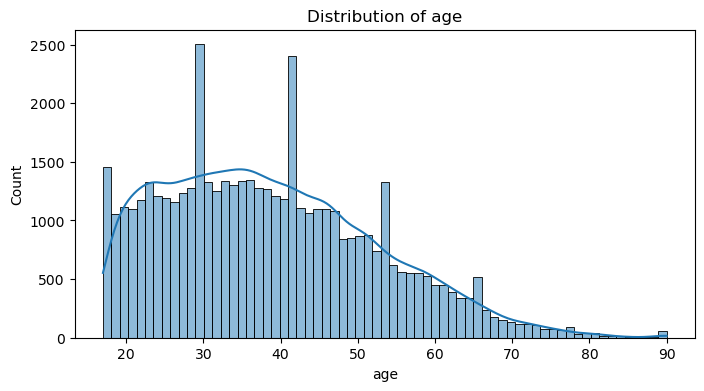

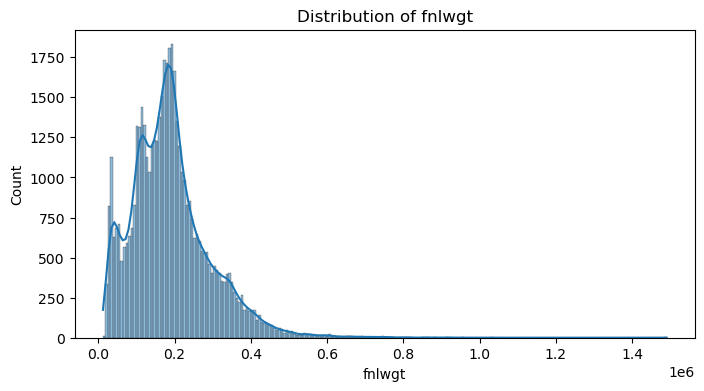

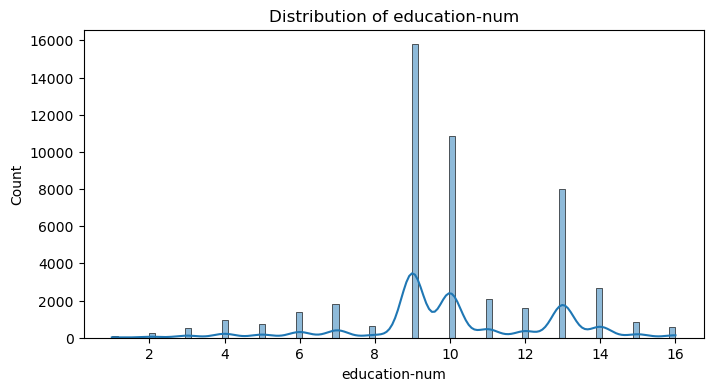

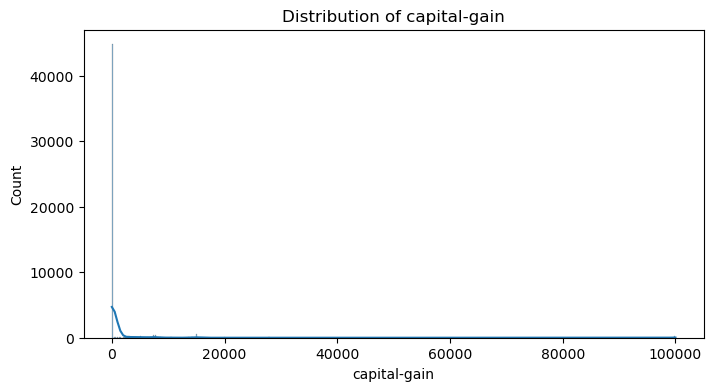

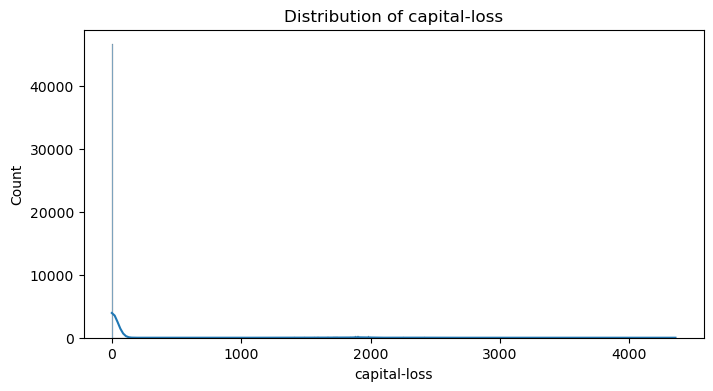

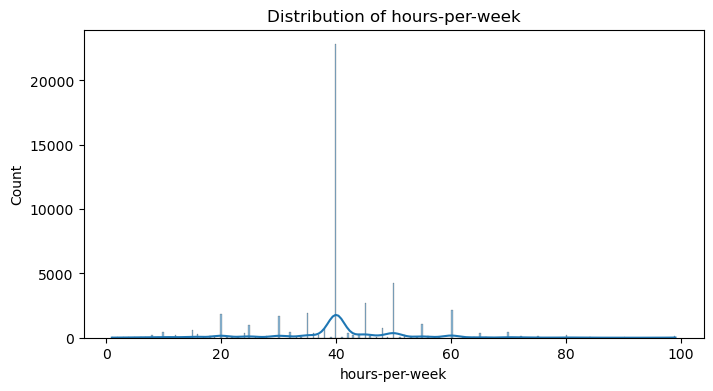

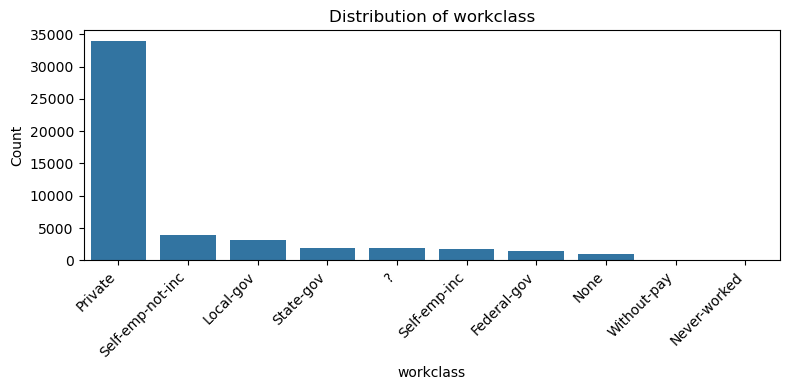

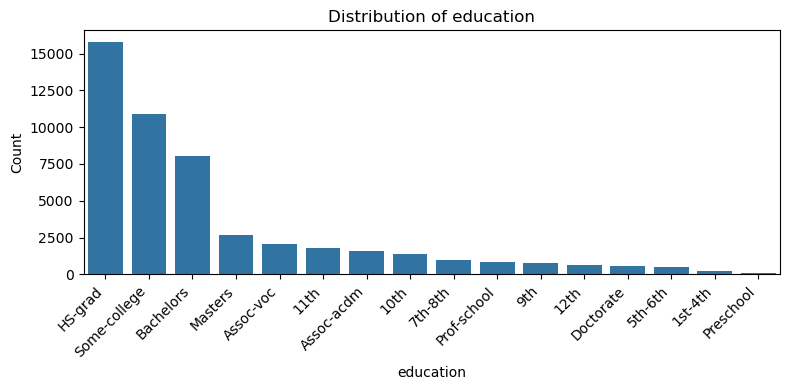

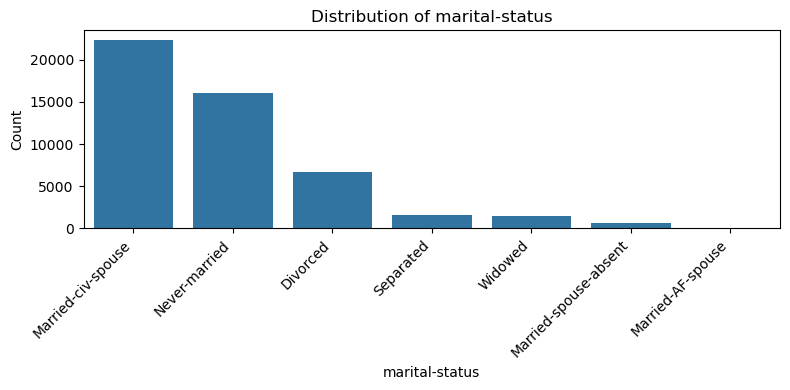

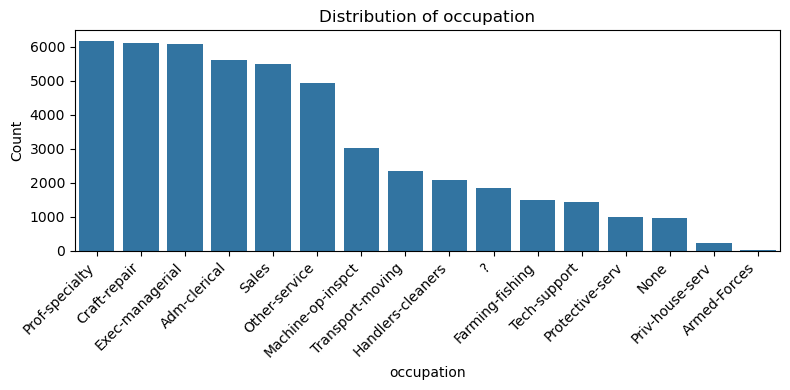

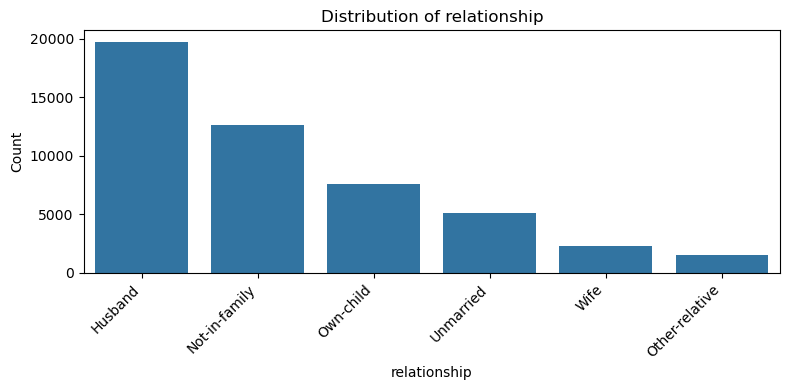

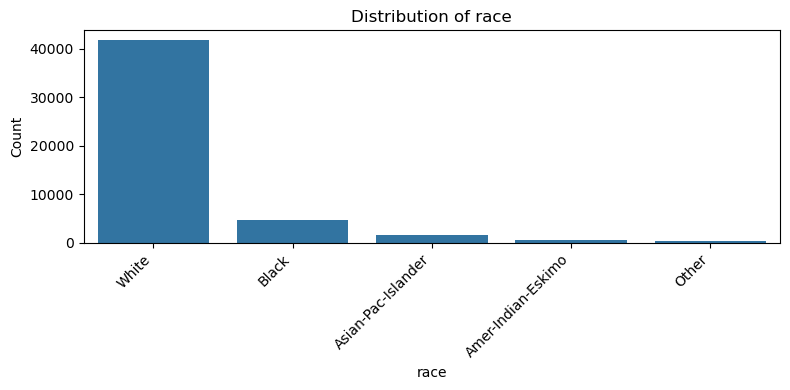

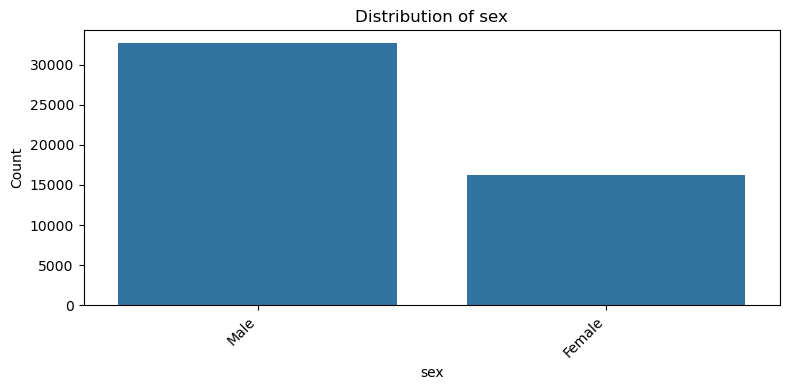

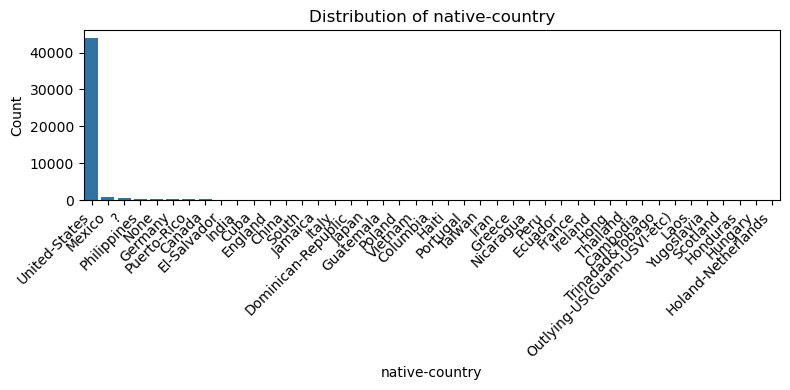

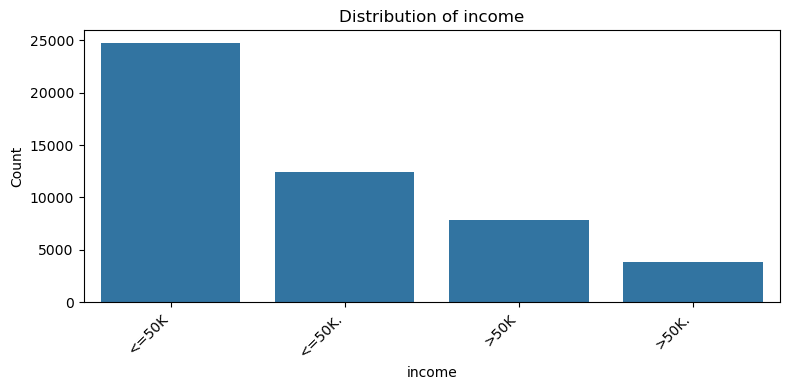

{'dtypes': Schema([('age', Int64),
         ('workclass', String),
         ('fnlwgt', Int64),
         ('education', String),
         ('education-num', Int64),
         ('marital-status', String),
         ('occupation', String),
         ('relationship', String),
         ('race', String),
         ('sex', String),
         ('capital-gain', Int64),
         ('capital-loss', Int64),
         ('hours-per-week', Int64),
         ('native-country', String),
         ('income', String)]),
 'description': shape: (9, 16)
 ┌────────────┬───────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬────────┐
 │ statistic  ┆ age       ┆ workclass  ┆ fnlwgt    ┆ … ┆ capital-l ┆ hours-per ┆ native-co ┆ income │
 │ ---        ┆ ---       ┆ ---        ┆ ---       ┆   ┆ oss       ┆ -week     ┆ untry     ┆ ---    │
 │ str        ┆ f64       ┆ str        ┆ f64       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ str    │
 │            ┆           ┆            ┆           ┆   ┆ f64       ┆ 

In [4]:
#1. Describe your data.
eda.get_data_description(df_raw)

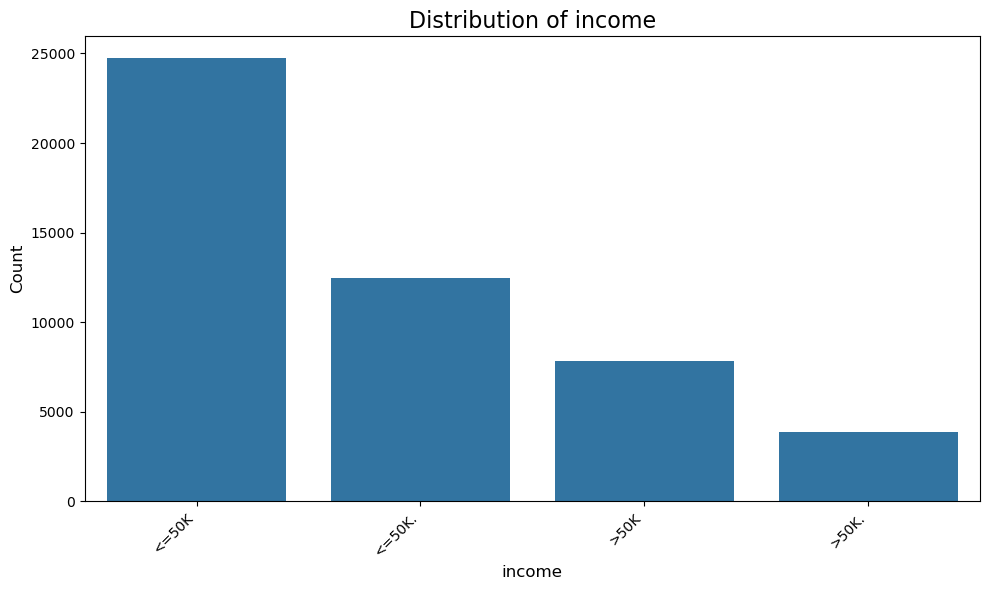

income,Count,Percent
str,u32,f64
"""<=50K""",24720,50.612178
"""<=50K.""",12435,25.459645
""">50K""",7841,16.053806
""">50K.""",3846,7.87437


In [5]:
#2. What is the distribution of the target variable?
eda.get_target_distribution(df_raw, 'income')


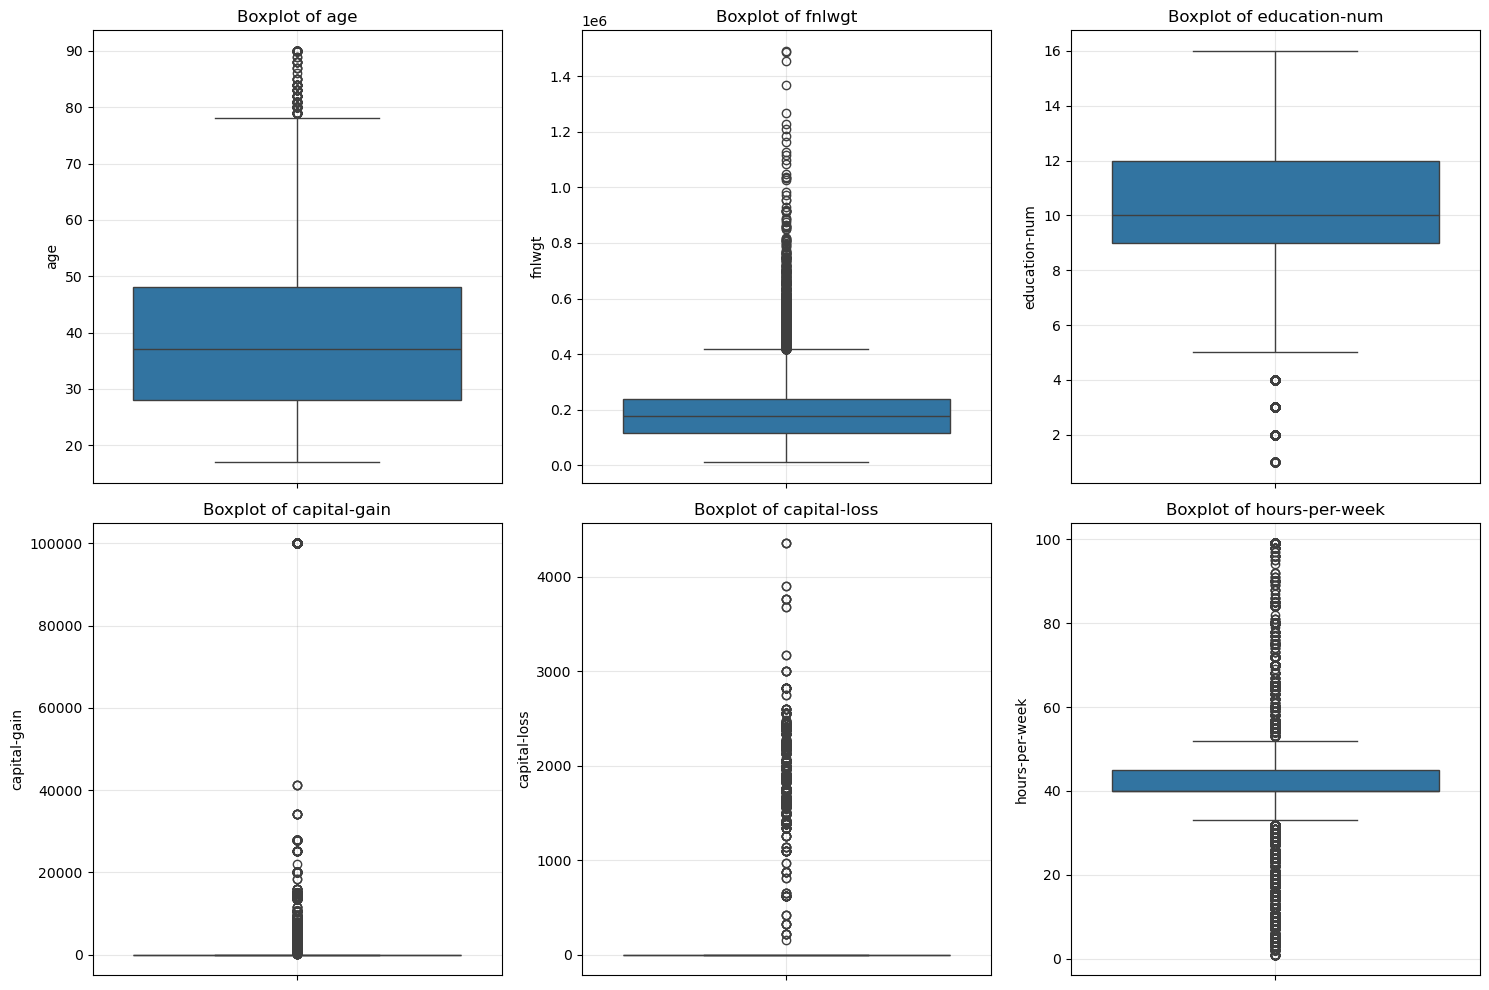

Column,Outlier Count,Percent,Lower Bound,Upper Bound,Missing Values
str,i64,f64,f64,f64,i64
"""workclass""",null,null,null,null,963
"""occupation""",null,null,null,null,966
"""native-country""",null,null,null,null,274
"""hours-per-week""",13496,27.631956,32.5,52.5,0
"""capital-gain""",4035,8.261332,0.0,0.0,0
"""capital-loss""",2282,4.672208,0.0,0.0,0
"""education-num""",1794,3.673068,4.5,16.5,0
"""fnlwgt""",1453,2.974899,-62596.5,417791.5,0
"""age""",216,0.442242,-2.0,78.0,0


In [6]:
#3. Do we face outliers and missing values?
eda.get_outliers_summary(df_raw)

### Outlier Handling Decision

Outliers detected above (particularly in `capital-gain`, `capital-loss`) represent genuine high-net-worth individuals. Removing them would bias the model against the very people we aim to detect. However, leaving them raw creates two problems:
1.  **Skew:** The extreme values (e.g., 99,999) heavily skew the distribution, which negatively impacts the GLM's convergence and performance.
2.  **Scale:** The magnitude of these values dwarfs other features like age (0-90), causing the model to disproportionately weight capital features or fail to converge.

**Strategy Chosen: Transformation (Signed Log + Scaling)**
Instead of removing or capping (Winsorising) these outliers, I handle them during the feature engineering phase of the modelling pipeline.
- I will apply a custom `SignedLogTransformer`. This compresses the massive spread of capital values while preserving zero values and the critical distinction between gains (positive) and losses (negative).

### Missing Data Imputation Strategy

The dataset contains missing values in three categorical columns: `workclass`, `occupation`, and `native_country`.

**Strategy chosen: Impute with "missing" category**

| Approach | Rationale |
|----------|-----------|
| Categorical, stays missing | Missingness may be informative e.g. someone unwilling to disclose occupation or work class could correlate with income |
| Numeric, use median | Median is robust to outliers (unlike mean). Used inside sklearn pipeline to avoid information leakage.  |

**Alternatives considered:**

| Alternative | Why rejected |
|-------------|--------------|
| Drop rows with missing values | Would lose ~7% of data; missingness may not be random, so we lose potential predictor information |
| Drop columns with missing values | Would lose whole features, again we lose potential predictor information  |

In [7]:
# Cleaning pipeline
df_clean = cleaning.full_clean(df_raw)
df_clean.columns

['unique_id',
 'age',
 'work_class',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'hours_per_week',
 'native_country',
 'high_income',
 'capital_net',
 'is_white',
 'is_black',
 'is_female',
 'is_married_healthy',
 'age_x_education']

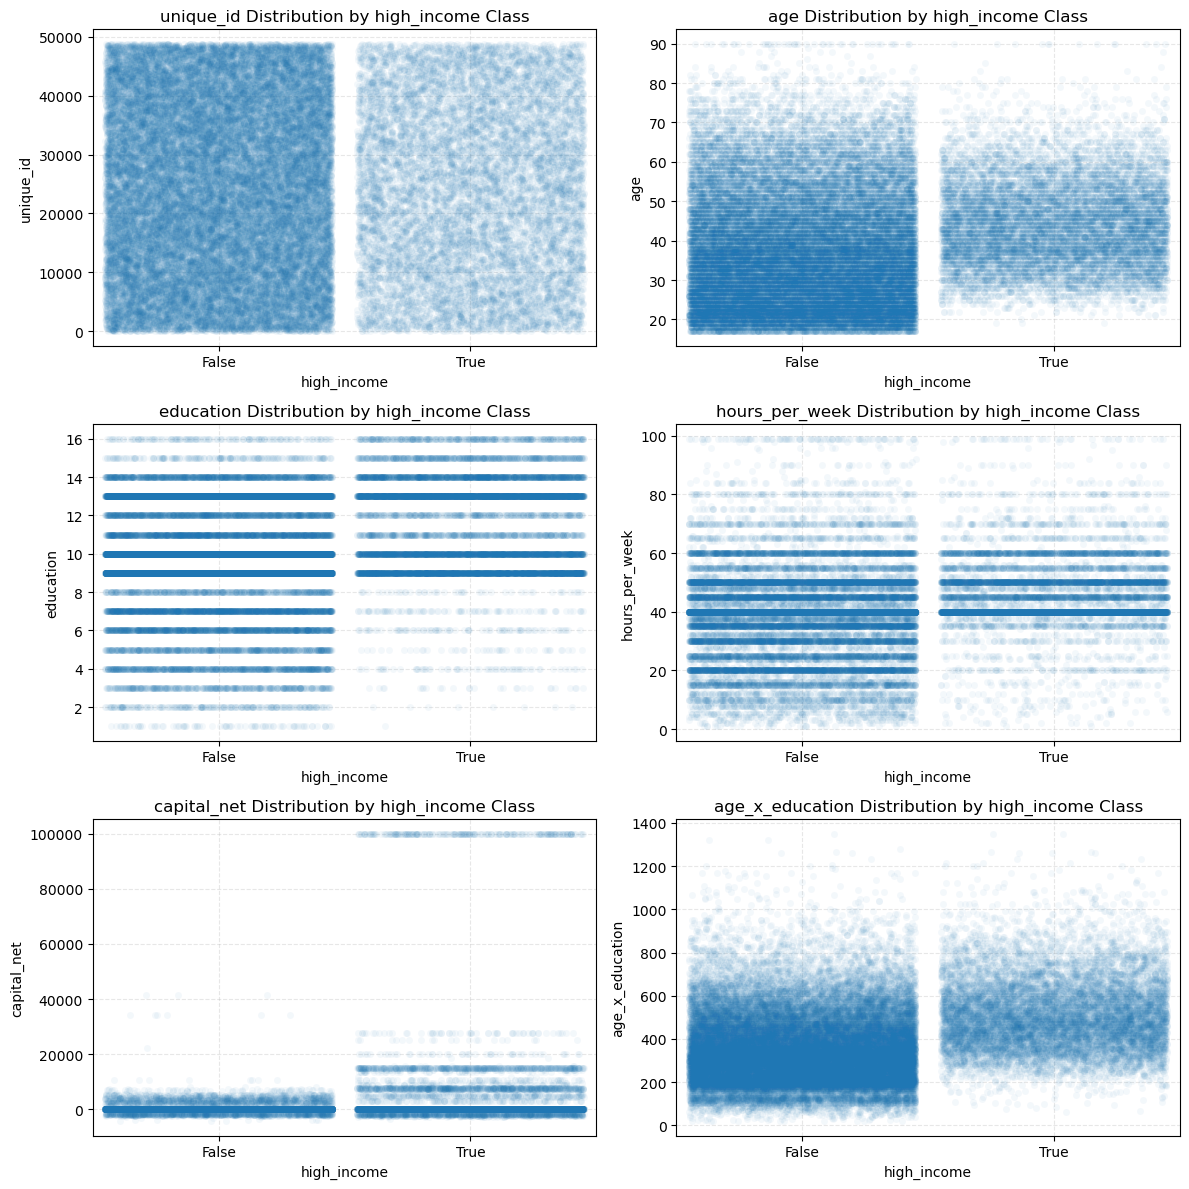

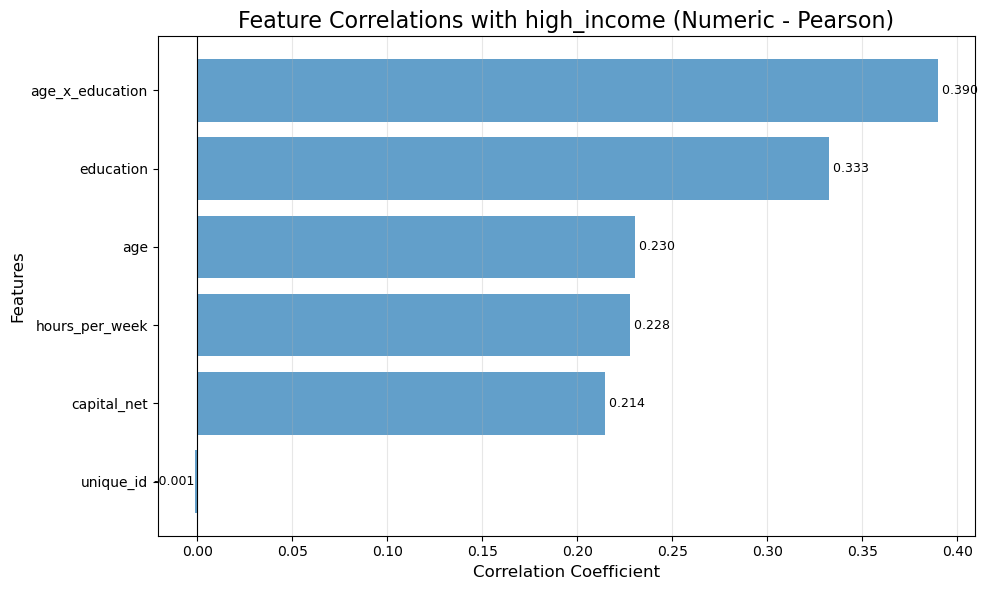

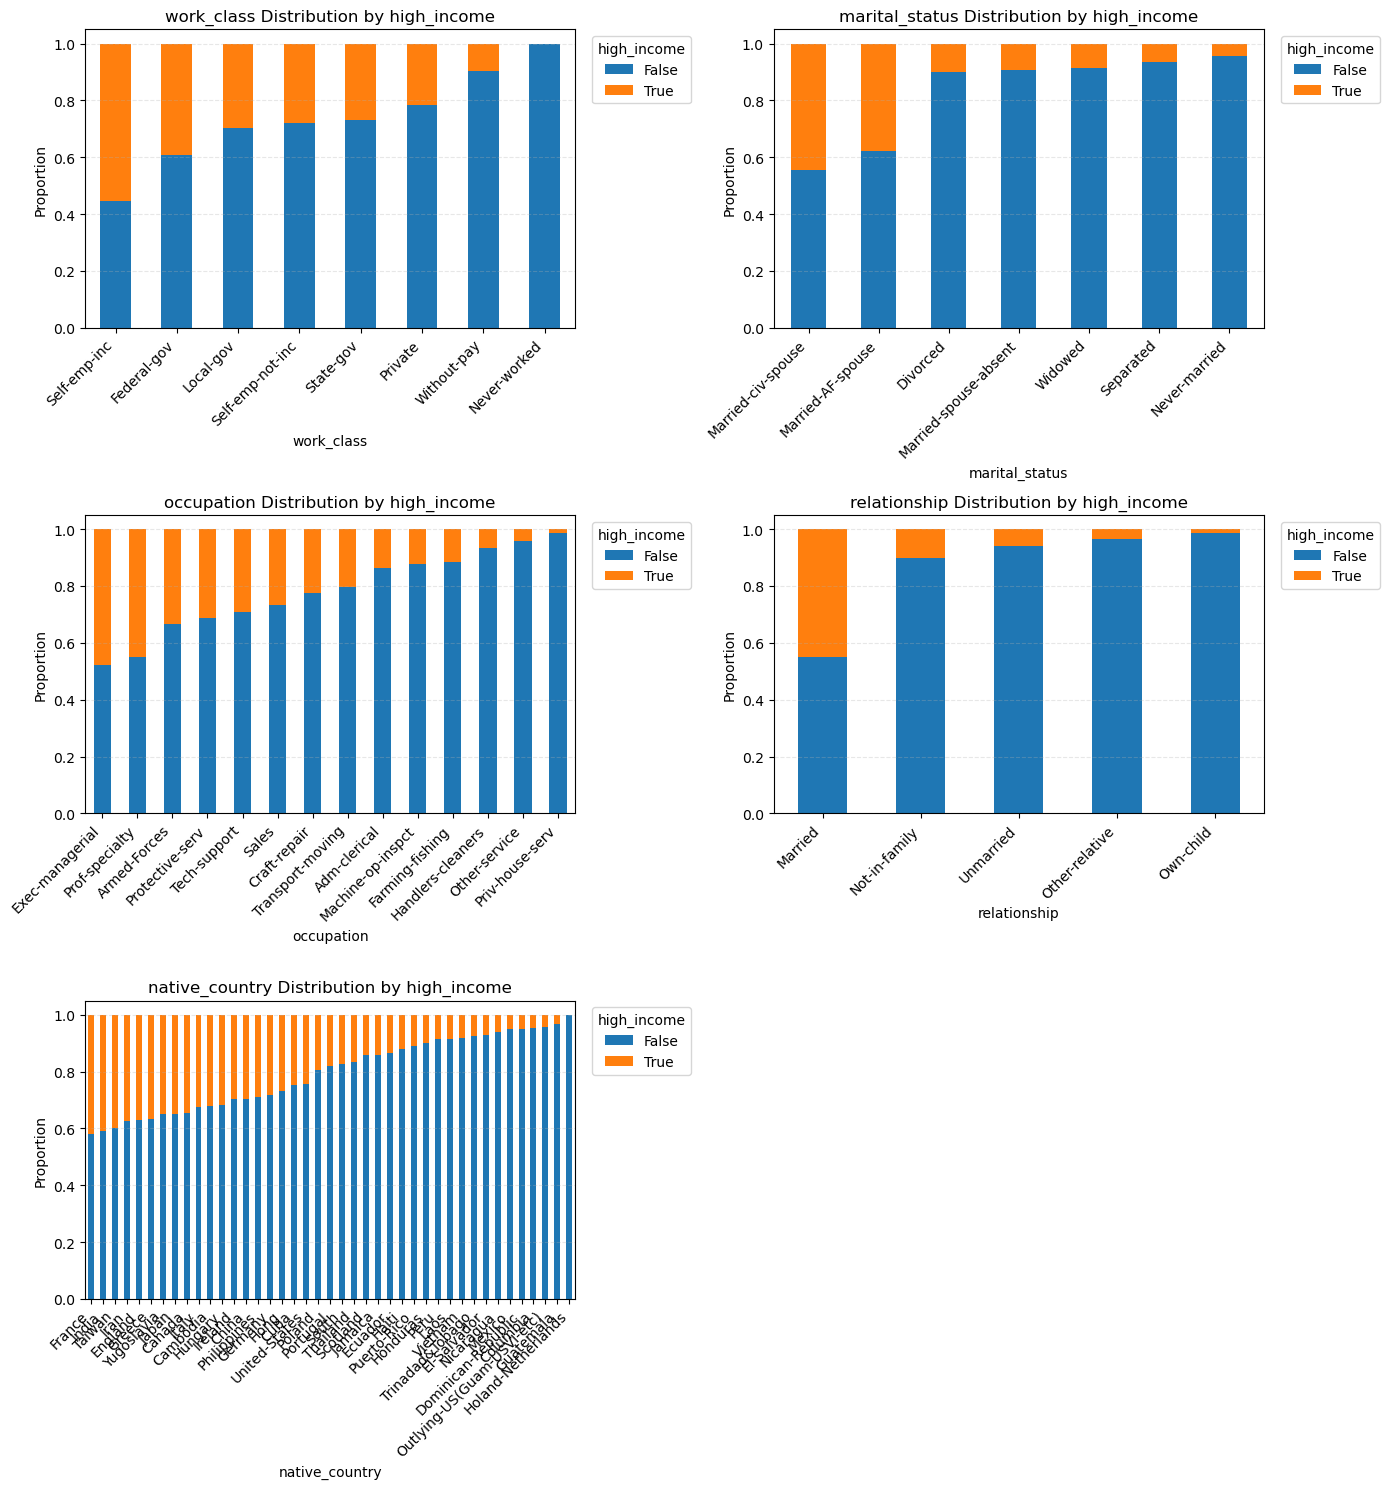

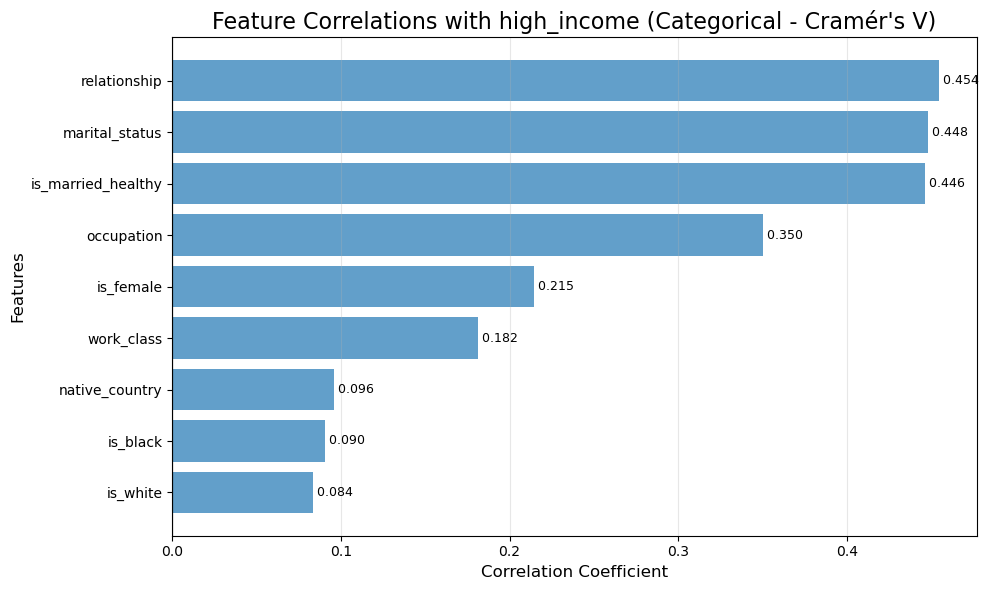

{'numeric': shape: (6, 2)
 ┌─────────────────┬─────────────┐
 │ feature         ┆ correlation │
 │ ---             ┆ ---         │
 │ str             ┆ f64         │
 ╞═════════════════╪═════════════╡
 │ age_x_education ┆ 0.3899      │
 │ education       ┆ 0.332613    │
 │ age             ┆ 0.230369    │
 │ hours_per_week  ┆ 0.227687    │
 │ capital_net     ┆ 0.214356    │
 │ unique_id       ┆ -0.001475   │
 └─────────────────┴─────────────┘,
 'categorical': shape: (9, 2)
 ┌────────────────────┬─────────────┐
 │ feature            ┆ correlation │
 │ ---                ┆ ---         │
 │ str                ┆ f64         │
 ╞════════════════════╪═════════════╡
 │ relationship       ┆ 0.454381    │
 │ marital_status     ┆ 0.448302    │
 │ is_married_healthy ┆ 0.446244    │
 │ occupation         ┆ 0.350001    │
 │ is_female          ┆ 0.214577    │
 │ work_class         ┆ 0.181601    │
 │ native_country     ┆ 0.096224    │
 │ is_black           ┆ 0.090367    │
 │ is_white           ┆ 0.083

In [8]:
#4. How do specific features correlate with the target variable?
eda.get_feature_correlations(df_clean, 'high_income')

#5. What features can we use for the specific prediction task?

### Feature Selection Summary

Based on the exploratory analysis above, the following features are selected for the prediction task:

**Numeric Features:**
| Feature | Rationale |
|---------|-----------|
| `age` | Strong correlation with income; clear pattern showing income peaks mid-career |
| `education` | Ordinal encoding preserves natural ordering; higher education correlates with higher income |
| `capital_net` | Combined capital gains/losses; strong indicator of investment income |
| `hours_per_week` | Distinguishes full-time from part-time workers, as well as workers working beyond expected full-time hours |
| `is_female` | Binary encoding of sex; captures gender pay gap effects |
| `is_white`, `is_black` | Binary encoding of race; captures demographic income disparitie; This method captures three categories of race, White, Black, and Other  |
| `is_is_married_healthy` | Binary encoding of spouses together; captures value of healthy relationship |
| `age_x_education` | Help GLM recognise cross-feature correlation |

**Categorical Features:**
| Feature | Rationale |
|---------|-----------|
| `work_class` | Employment type (private, government, self-employed) affects income distribution |
| `occupation` | Strong predictor; executive and professional roles correlate with high income |
| `relationship` | Marital/household status correlates with income |
| `native_country` | May capture geographic/economic origin effects |

**Features Excluded:**
| Feature | Reason for Exclusion |
|---------|----------------------|
| `fnlwgt` | Census sampling weight; not predictive of individual income |
| `education-num` | Redundant with ordinal `education` encoding |
| `unique_id` | Artificial identifier with no predictive value |